In [23]:
import os

# Imports class for adding a new material
os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master\heatrapy')
from mats import calmatpro

# Imports heatrapy simulation
os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master')
import heatrapy as htp

In [24]:
# Class for storing layer properties
# Units are as follows: PCB_Layer(length=m, width=m, thk=m, cond_x=W/mK, cond_y=W/mK, cond_z=W/mK, layers=-)
class PCB_Layer:
    def __init__(self, length, width, thk, cond_x, cond_y, cond_z, layers):
        self.length = length
        self.width = width
        self.thk =  thk
        self.cond_x = cond_x
        self.cond_y = cond_y
        self.cond_z = cond_z
        self.layers = layers

    def condty_x(abc):
        # Note this is the reciprocal
        a_cs_x = abc.length * abc.thk
        R_x = (abc.layers * abc.width) / (abc.cond_x * a_cs_x)
        return R_x

    def condty_y(abc):
        # Note this is the reciprocal
        a_cs_y = abc.width * abc.thk
        R_y = (abc.layers * abc.length) / (abc.cond_y * a_cs_y)
        return R_y

    def condty_z(abc):
        a_cs_z = abc.width * abc.length
        R_z = (abc.layers * abc.thk) / (abc.cond_z * a_cs_z)
        return R_z

    def total_z(abc):
        z_total = abc.thk * abc.layers
        return z_total

In [25]:
# Class for calculating overall conductivity via overall conductance
# Input is a list of materials that are made with the 'PCB_Layer' class
class Conductance:
    def __init__(self, list):
        self.list = list

    def conductivity_x(Layer_Materials):
        size_check_x, size_check_y = [], []
        thk_overall, max_x, max_y = 0, 0, 0
        R_x_sum = 0

        for laminate in Layer_Materials:
            thk_overall += laminate.total_z()
            size_check_x.append(laminate.width)
            max_x = max(size_check_x)
            size_check_y.append(laminate.length)
            max_y = max(size_check_y)
            
            R_x_sum += (1/(laminate.condty_x()))
        
        R_x_overall = 1/R_x_sum
        k_x_overall = max_x / (R_x_overall * (thk_overall*max_y))

        return k_x_overall


    def conductivity_y(Layer_Materials):
        size_check_x, size_check_y = [], []
        thk_overall, max_x, max_y = 0, 0, 0
        R_y_sum = 0

        for laminate in Layer_Materials:
            thk_overall += laminate.total_z()
            size_check_x.append(laminate.width)
            max_x = max(size_check_x)
            size_check_y.append(laminate.length)
            max_y = max(size_check_y)
    
            R_y_sum += (1/(laminate.condty_y()))

        R_y_overall = 1/R_y_sum
        k_y_overall = max_y / (R_y_overall * (max_x*thk_overall))

        return k_y_overall


    def conductivity_z(Layer_Materials):
        size_check_x, size_check_y = [], []
        thk_overall, max_x, max_y = 0, 0, 0
        R_z_overall = 0

        for laminate in Layer_Materials:
            thk_overall += laminate.total_z()
            size_check_x.append(laminate.width)
            max_x = max(size_check_x)
            size_check_y.append(laminate.length)
            max_y = max(size_check_y)
    
            R_z_overall += laminate.condty_z()

        k_z_overall = thk_overall / (R_z_overall * (max_x*max_y))

        return k_z_overall

In [34]:
class Material_Creation:
    def __init__(self, k, rho, cp):
        self.k   = k
        self.rho = rho
        self.cp  = cp

    def cond_change(abc):
        os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master\heatrapy\database\PCB_Material_2')

        # For the '0' type
        with open('k0.txt', 'r') as file:
            filedata = file.read()
            for line in filedata:
                words = filedata.split()
            old_data = words[1]

        k_x = abc.k
        new_data = str(k_x)
        filedata = filedata.replace(old_data, new_data)

        with open('k0.txt', 'w') as file:
            file.write(filedata)

        # For the 'a' type
        with open('ka.txt', 'r') as file:
            filedata = file.read()
            for line in filedata:
                words = filedata.split()
            old_data = words[1]

        k_x = abc.k
        new_data = str(k_x)
        filedata = filedata.replace(old_data, new_data)

        with open('ka.txt', 'w') as file:
            file.write(filedata)
        
        os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master')

    def density_change(abc):
        os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master\heatrapy\database\PCB_Material_2')

        # For the '0' type
        with open('rho0.txt', 'r') as file:
            filedata = file.read()
            for line in filedata:
                words = filedata.split()
            old_data = words[1]

        k_x = abc.rho
        new_data = str(k_x)
        filedata = filedata.replace(old_data, new_data)

        with open('rho0.txt', 'w') as file:
            file.write(filedata)

        # For the 'a' type
        with open('rhoa.txt', 'r') as file:
            filedata = file.read()
            for line in filedata:
                words = filedata.split()
            old_data = words[1]

        k_x = abc.rho
        new_data = str(k_x)
        filedata = filedata.replace(old_data, new_data)

        with open('rhoa.txt', 'w') as file:
            file.write(filedata)
        
        os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master')

    def cp_change(abc):
        os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master\heatrapy\database\PCB_Material_2')

        # For the '0' type
        with open('cp0.txt', 'r') as file:
            filedata = file.read()
            for line in filedata:
                words = filedata.split()
            old_data = words[1]

        k_x = abc.cp
        new_data = str(k_x)
        filedata = filedata.replace(old_data, new_data)

        with open('cp0.txt', 'w') as file:
            file.write(filedata)

        # For the 'a' type
        with open('cpa.txt', 'r') as file:
            filedata = file.read()
            for line in filedata:
                words = filedata.split()
            old_data = words[1]

        k_x = abc.cp
        new_data = str(k_x)
        filedata = filedata.replace(old_data, new_data)

        with open('cpa.txt', 'w') as file:
            file.write(filedata)
        
        os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master')

In [4]:
# Define Materials using the 'Layer' class
# Units are as follows: PCB_Layer(length=m, width=m, thk=m, cond_x=W/mK, cond_y=W/mK, cond_z=W/mK, layers=-)
Cu_t = PCB_Layer(length=0.1016, width=0.1524, thk=0.00007112, cond_x=334.400, cond_y=334.400, cond_z=334.400, layers=1)
Cu_m = PCB_Layer(length=0.1016, width=0.1524, thk=0.00007112, cond_x=334.400, cond_y=334.400, cond_z=334.400, layers=1)
VT   = PCB_Layer(length=0.1016, width=0.1524, thk=0.00010160, cond_x=2.200,   cond_y=2.200,   cond_z=3.400,   layers=2)
Al   = PCB_Layer(length=0.1016, width=0.1524, thk=0.00157480, cond_x=167.0,   cond_y=167.0,   cond_z=167.0,   layers=1)

# Stores all layer info in a list
Layer_Materials = [Cu_t, Cu_m, VT, Al]

In [35]:
# Calculate Overall Conductivities using the 'Conductance' class methods
PCB_k_x = Conductance.conductivity_x(Layer_Materials)
PCB_k_y = Conductance.conductivity_y(Layer_Materials)
PCB_k_z = Conductance.conductivity_z(Layer_Materials)

print(PCB_k_x)
print(PCB_k_y)
print(PCB_k_z)

161.7862433862434
161.7862433862434
27.581727465155712


In [36]:
PCB_Material = Material_Creation(PCB_k_x, 168.256, 8465.9173456)

PCB_Material.cond_change()
PCB_Material.density_change()
PCB_Material.cp_change()

In [6]:
# Class for Square Components
# Units are as follows: PCB_Comp_sqr(bl_x=mm, bl_y=mm, width=mm, height=mm, ori=-, power=mW)
class PCB_Comp_sqr:
    def __init__(self, bl_x, bl_y, width, height, ori, power):
        self.bl_x = bl_x
        self.bl_y = bl_y
        self.width =  width
        self.height = height
        self.ori = ori
        self.power = power

    def shape(abc):
        return 'square'
        
    def blc(abc):
        return (abc.bl_x, abc.bl_y)   

    def trc(abc):
        top_right_corner = (0, 0)
        if abc.ori == 1:
            top_right_corner = (abc.bl_x + abc.width, abc.bl_y + abc.height)
        else:
            top_right_corner = (abc.bl_x + abc.height, abc.bl_y + abc.width)
        return top_right_corner

    def length(abc):
        if abc.ori == 1:
            length_code = (abc.width, abc.height)
        else:
            length_code = (abc.height, abc.width)
        return length_code

# Class for Circular Components
# Units are as follows: PCB_Comp_cir(ctr_x=mm, ctr_y=mm, rad=mm, power=mW)
class PCB_Comp_cir:
    def __init__(self, ctr_x, ctr_y, rad, power):
        self.ctr_x = ctr_x
        self.ctr_y = ctr_y
        self.rad =  rad
        self.power = power

    def ctr(abc):
        return (abc.ctr_x, abc.ctr_y) 

    def shape(abc):
        return 'circle'

In [7]:
# Define components using PCB_Comp Class

# PCB Board Size (mm)
PCB_l = 102 # or 4''
PCB_w = 152 # or 6''

# FETs are IMBG65R048M1HXTMA1 from Infineon
FET_1a = PCB_Comp_sqr(bl_x=25, bl_y=25, width=10, height=2, ori=1, power=10000)
FET_1b = PCB_Comp_sqr(bl_x=25, bl_y=33, width=10, height=7, ori=1, power=10000)
FET_2a = PCB_Comp_sqr(bl_x=40, bl_y=25, width=10, height=2, ori=1, power=20000)
FET_2b = PCB_Comp_sqr(bl_x=40, bl_y=33, width=10, height=7, ori=1, power=20000)
FET_3a = PCB_Comp_sqr(bl_x=55, bl_y=25, width=10, height=2, ori=1, power=30000)
FET_3b = PCB_Comp_sqr(bl_x=55, bl_y=33, width=10, height=7, ori=1, power=30000)

# Transformers are CAT6243 from Onsemi
Transformer_1a = PCB_Comp_sqr(bl_x=102, bl_y=67, width=5, height=1, ori=1, power=40000)
Transformer_1b = PCB_Comp_sqr(bl_x=102, bl_y=71, width=5, height=1, ori=1, power=40000)
Transformer_2a = PCB_Comp_sqr(bl_x=102, bl_y=77, width=5, height=1, ori=0, power=40000)
Transformer_2b = PCB_Comp_sqr(bl_x=106, bl_y=77, width=5, height=1, ori=0, power=40000)

# Inductors are DMN3020UTS by Diodes Inc
Inductor_1a = PCB_Comp_sqr(bl_x=34, bl_y=76, width=3, height=2, ori=1, power=40000)
Inductor_1b = PCB_Comp_sqr(bl_x=34, bl_y=80, width=3, height=2, ori=1, power=40000)
Inductor_2a = PCB_Comp_sqr(bl_x=51, bl_y=76, width=3, height=2, ori=1, power=40000)
Inductor_2b = PCB_Comp_sqr(bl_x=51, bl_y=80, width=3, height=2, ori=1, power=40000)

# Common Mode Choke is SCF47X-200-S1R8B011JH by Kemet
Choke_1 = PCB_Comp_cir(ctr_x=120, ctr_y=30, rad=21, power=30000)

# Store all component information in a list
Component_list = [FET_1a, FET_1b, FET_2a, FET_2b, FET_3a, FET_3b,
              Transformer_1a, Transformer_1b, Transformer_2a, Transformer_2b,
              Inductor_1a, Inductor_1b, Inductor_2a, Inductor_2b]

In [33]:
# Initiate heatrapy simulation
example = htp.SingleObject2D(
    293,
    material='PCB_material_2',
    dx=0.001,
    dy=0.001,
    boundaries=(300, 0, 0, 0),
    size=(PCB_w, PCB_l))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DBaltazar\\Desktop\\JUPYTER - Python\\heatrapy-master\\heatrapy\\dimension_2\\objects\\..\\..\\database\\PCB_material\\tadi.txt'

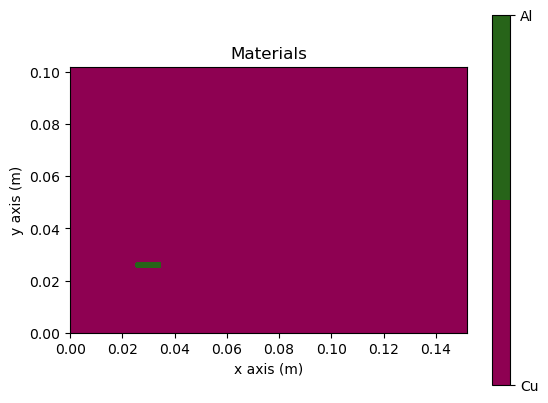

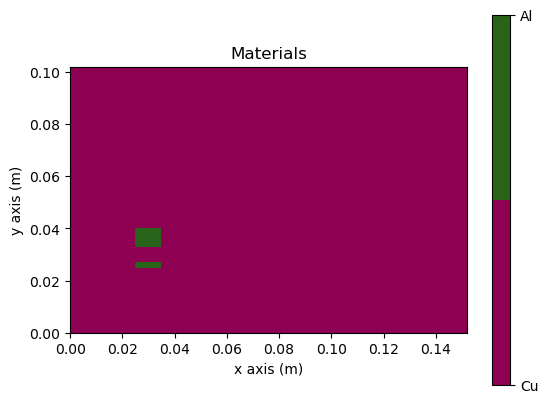

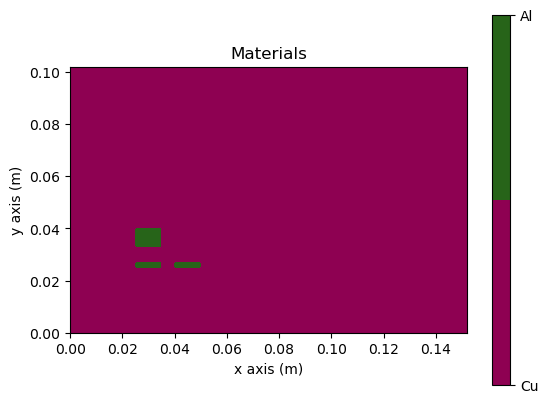

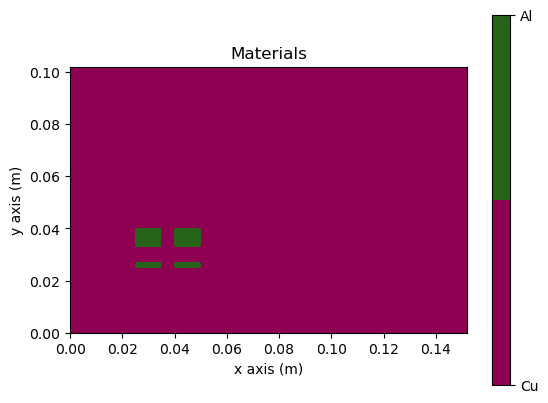

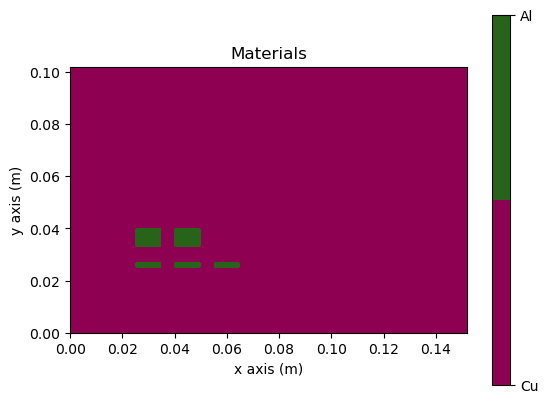

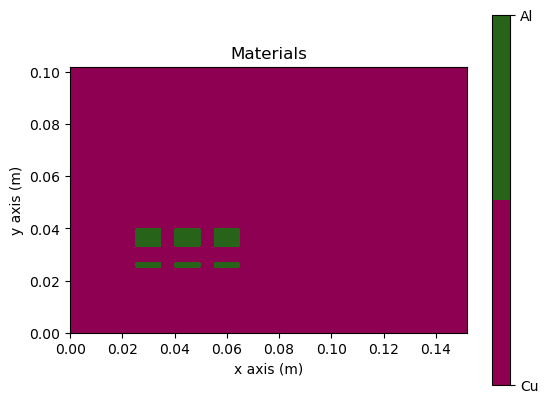

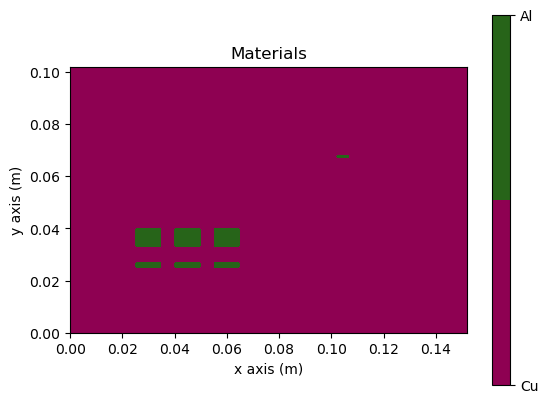

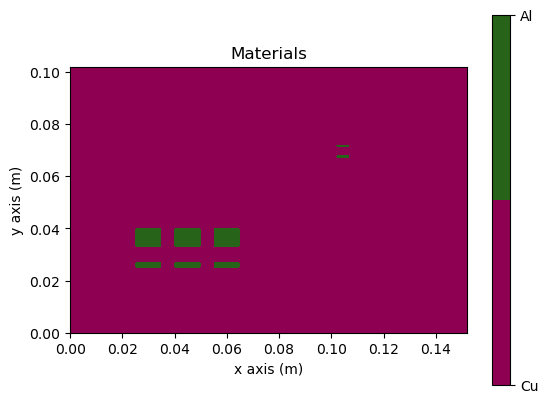

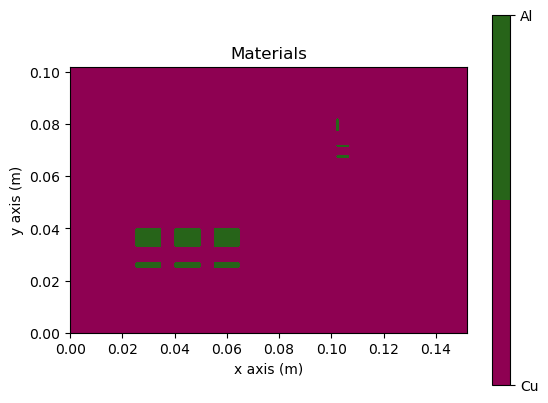

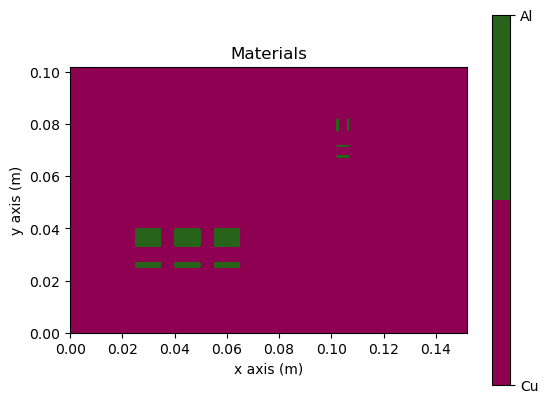

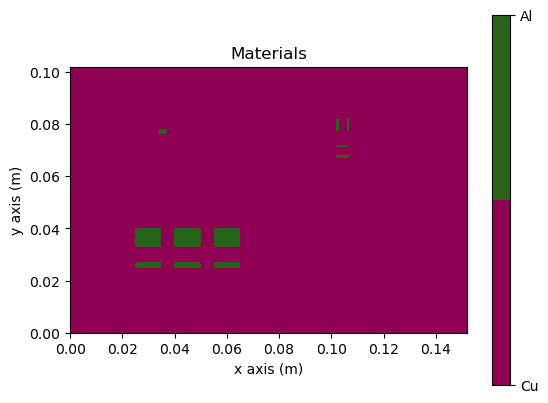

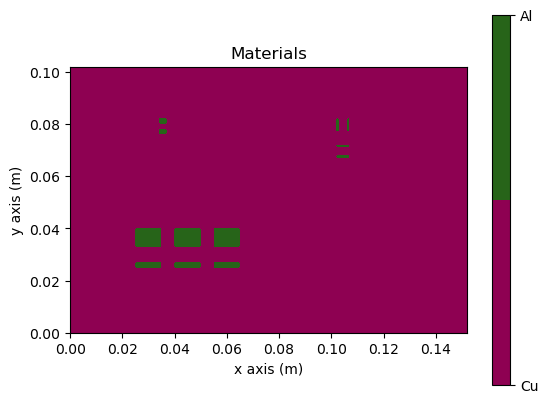

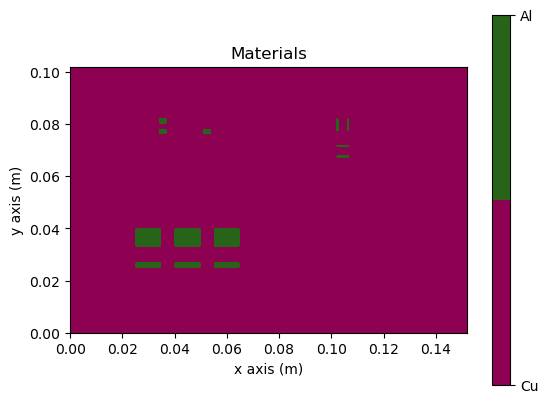

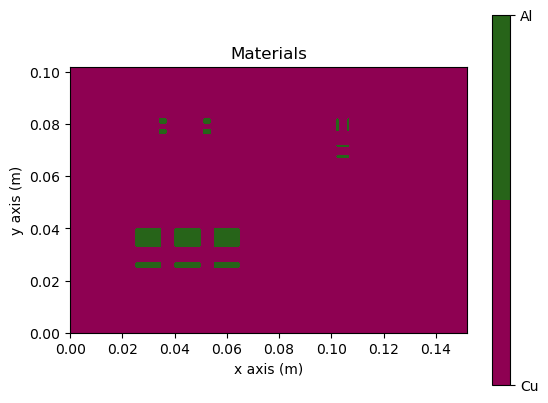

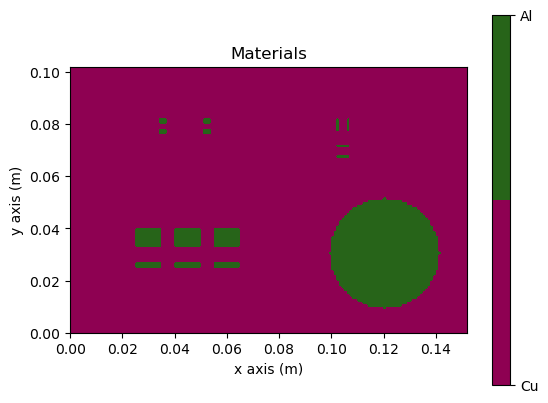

In [9]:
# Add component leads onto board
for component in Component_list:
    example.change_material(
        material='Al',
        shape=component.shape(),
        initial_point=component.blc(),
        length=component.length())

example.change_material(
    material='Al',
    shape=Choke_1.shape(),
    initial_point=Choke_1.ctr(),
    length=Choke_1.rad)

In [10]:
# Change component power dissipations
for component in Component_list:
    example.change_power(
        shape=component.shape(), 
        power_type='Q', 
        initial_point=component.blc(), 
        final_point=component.trc(), 
        power=component.power)

example.change_power(
    shape=Choke_1.shape(), 
    power_type='Q', 
    initial_point=Choke_1.ctr(),
    final_point=Choke_1.rad,
    power=Choke_1.power)

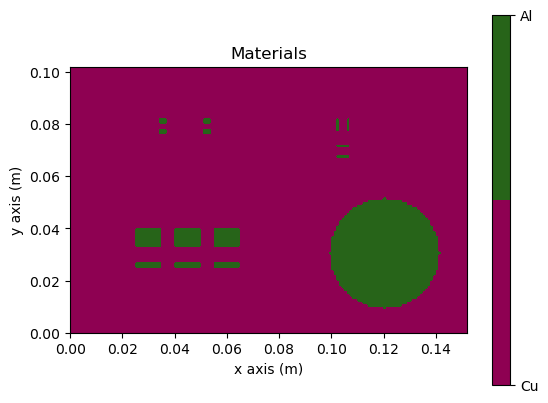

['Cu', 'Al']


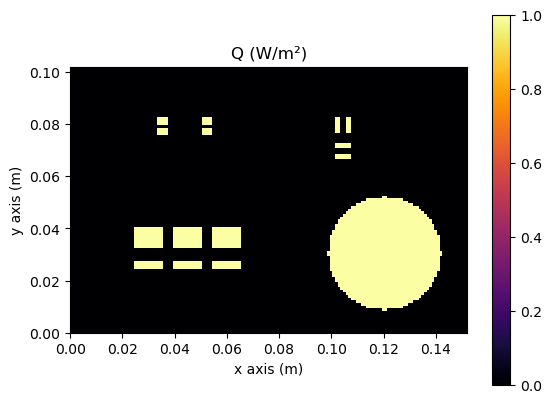

In [11]:
# Check simulation set-up
example.show_figure(figure_type = 'materials')
example.show_figure(figure_type = 'Q')

In [14]:
help(mats.calmatpro)

Help on module mats.calmatpro in mats:

NAME
    mats.calmatpro - Contains the class calmatpro.

DESCRIPTION
    Used to access the properties of materials from the database.

CLASSES
    builtins.object
        CalMatPro
    
    class CalMatPro(builtins.object)
     |  CalMatPro(name_tadi, name_tadd, name_cpa, name_cp0, name_k0, name_ka, name_rho0, name_rhoa, name_lheat0, name_lheata)
     |  
     |  CalMatPro class.
     |  
     |  Loads and gives physical properties of materials from the database
     |  
     |  Methods defined here:
     |  
     |  __init__(self, name_tadi, name_tadd, name_cpa, name_cp0, name_k0, name_ka, name_rho0, name_rhoa, name_lheat0, name_lheata)
     |      Thermal properties from materials folder.
     |      
     |      `name_tadi` is the adiabatic temperature increase file and `name_tadd`
     |      is the adiabatic temperature decrease file. `name_cp0` is the specific
     |      heat file and `name_cpa` is the active specific heat file. `name_k0`